In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.applications.vgg16 import VGG16
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
IMAGE_SIZE=512

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  56
  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  95
  96  98  99 100 101 102 103 105 106 107 108 111 112 114 115 117 119 120
 121 122 123 124 125 126 128 129 131 133 134 135 138 139 140 141 142 143
 146 147 148 149 150 152 154 157 158 159 160 161 162 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 180 181 182 184 185 187 188 189
 191 192 193 195 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 220 221 222 223 224 225 226 227 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255]


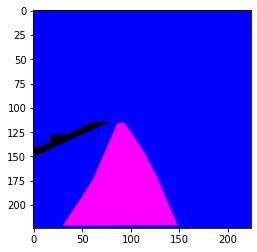

In [ ]:
import matplotlib.pyplot as plt
labelimg=cv2.imread('/content/drive/MyDrive/data_road_224/training/gt_image_2/gt_image_224 (1).png',1)
plt.imshow(labelimg)
print(np.unique(labelimg))

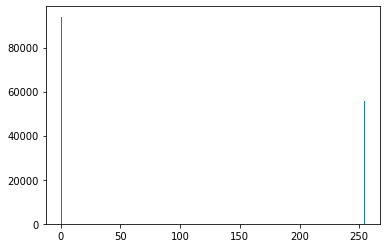

In [ ]:
plt.hist(labelimg.ravel(), bins=256, range=[0, 255])
plt.show()


[0 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


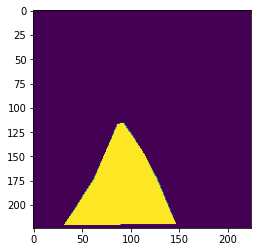

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
label_bgr=cv2.imread('/content/drive/MyDrive/data_road_224/training/gt_image_2/gt_image_224 (1).png',1)

# Convert BGR image to RGB format
label_rgb = cv2.cvtColor(label_bgr, cv2.COLOR_BGR2RGB)

# Set the lower and upper bounds for the RGB values of the lane
lower_lane_color = np.array([255, 0, 255])
upper_lane_color = np.array([255, 0, 255])

# Create a binary mask by thresholding the image based on the RGB values of the lane
mask = cv2.inRange(label_rgb, lower_lane_color, upper_lane_color)
mask[mask == 255] = 1  # Set lane pixels to 1, non-lane pixels to 0

# Display the binary mask
plt.imshow(mask)
print(np.unique(mask))
print(np.array(mask))

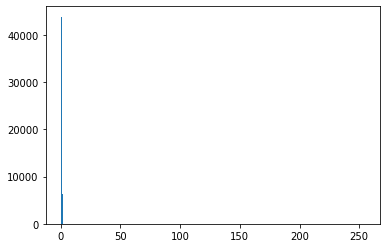

In [ ]:
plt.hist(mask.ravel(), bins=256, range=[0, 255])
plt.show()

In [ ]:
import glob
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load images and labels
image_names = glob.glob('/content/drive/MyDrive/data_road_224/training/image_2/*.png')
image_names.sort()
images = np.array([cv2.resize(cv2.imread(image, 1), (224, 224)) for image in image_names])


[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [  9  13  19]
   [ 16  33  23]
   [ 46 102  65]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 18  23  22]
   [ 37  48  40]
   [ 27  56  46]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 46  85  71]
   [ 51  80  84]
   [ 40  83  81]]

  ...

  [[ 67  62  55]
   [ 66  64  64]
   [ 63  70  73]
   ...
   [ 97  98  96]
   [ 98  99 101]
   [ 99  96 100]]

  [[ 85  80  76]
   [ 75  79  89]
   [ 68  77  84]
   ...
   [ 91  94  95]
   [ 95  96  95]
   [ 96  96  96]]

  [[ 69  70  71]
   [ 72  63  55]
   [ 68  67  70]
   ...
   [ 93  95  95]
   [ 94  95  93]
   [ 96  95  94]]]


 [[[210 187 143]
   [203 180 135]
   [192 175 127]
   ...
   [ 77 110 107]
   [ 64  96  77]
   [ 52  60  58]]

  [[205 184 137]
   [202 175 136]
   [194 172 133]
   ...
   [105 155 123]
   [ 72 108  85]
   [ 47  56  61]]

  [[204 186 136]
   [201 175 132]
   [195 168 130]
   ...
   [ 78 141 103]
   [ 77 100  83]
   [ 36  41

In [ ]:
import cv2
import numpy as np
import glob

label_names = glob.glob('/content/drive/MyDrive/data_road_224/training/gt_image_2/*.png')
label_names.sort()

labels = []
for label in label_names:
    label_img = cv2.imread(label, cv2.IMREAD_COLOR) # Read image in BGR format
    label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB) # Convert image to RGB format

    lane_color = np.array([255, 0, 255]) # Set color of lane
    label_mask = cv2.inRange(label_img, lane_color, lane_color) # Create binary mask
    label_mask[label_mask == 255] = 1 # Set lane pixels to 1, non-lane pixels to 0
    label_mask = cv2.resize(label_mask, (224, 224)) # Resize image to (224, 224)

    labels.append(label_mask)

labels = np.array(labels)


In [ ]:
print(images.shape)
print(labels.shape)
# Reshape labels
labels = np.reshape(labels, (-1, 1))
print(labels.shape)
labels = np.reshape(labels, (289, 224, 224, 1))
print(labels.shape)
print(np.unique(labels))
print(np.unique(images))

(289, 224, 224, 3)
(289, 224, 224)
(14500864, 1)
(289, 224, 224, 1)
[0 1]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 2

In [ ]:
# Define model architecture
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output


def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)
    input_a = layers.UpSampling2D(
    size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
    interpolation="bilinear",)(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1, use_bias=True)
    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x, num_filters=256, kernel_size=3, dilation_rate=1, padding="same")

    x = layers.UpSampling2D(size=(4, 4), interpolation="bilinear")(x)
    x = convolution_block(x, num_filters=256, kernel_size=3, dilation_rate=1, padding="same")
    x = convolution_block(x, num_filters=num_classes, kernel_size=1, dilation_rate=1, padding="same", use_bias=True)

    output = layers.Activation("sigmoid")(x)

    model = keras.Model(model_input, output, name="DeeplabV3Plus")
    return model

# Instantiate the model
image_size = 224
num_classes = 1 # binary classification
model = DeeplabV3Plus(image_size, num_classes)

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])



94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


ValueError: ignored

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(231, 224, 224, 3)
(58, 224, 224, 3)
(231, 224, 224, 1)
(58, 224, 224, 1)


In [ ]:
# Train the
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=25, batch_size=32)

Epoch 1/25
8/8 [==============================] - 90s 4s/step - loss: 0.7158 - accuracy: 0.7039 - val_loss: 0.6854 - val_accuracy: 0.9020
Epoch 2/25
8/8 [==============================] - 14s 2s/step - loss: 0.6347 - accuracy: 0.9061 - val_loss: 0.6373 - val_accuracy: 0.8881
Epoch 3/25
8/8 [==============================] - 13s 2s/step - loss: 0.6180 - accuracy: 0.9537 - val_loss: 0.6328 - val_accuracy: 0.8625
Epoch 4/25
8/8 [==============================] - 13s 2s/step - loss: 0.6118 - accuracy: 0.9656 - val_loss: 0.6353 - val_accuracy: 0.8457
Epoch 5/25
8/8 [==============================] - 13s 2s/step - loss: 0.6078 - accuracy: 0.9716 - val_loss: 0.6311 - val_accuracy: 0.8422
Epoch 6/25
8/8 [==============================] - 13s 2s/step - loss: 0.6057 - accuracy: 0.9749 - val_loss: 0.6306 - val_accuracy: 0.8563
Epoch 7/25
8/8 [==============================] - 13s 2s/step - loss: 0.6042 - accuracy: 0.9763 - val_loss: 0.6290 - val_accuracy: 0.8664
Epoch 8/25
8/8 [==================

In [ ]:
model.save('model_lane_dplv3_97.26%.h5')

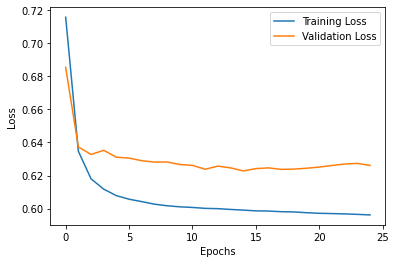

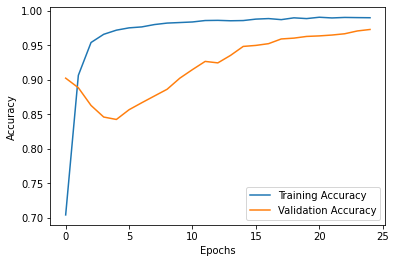

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 2s 2s/step
[0.5        0.5000034  0.50003904 ... 0.8697015  0.87063813 0.87129474]
[0 1]


<ipython-input-14-4f9c61ca42d8>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


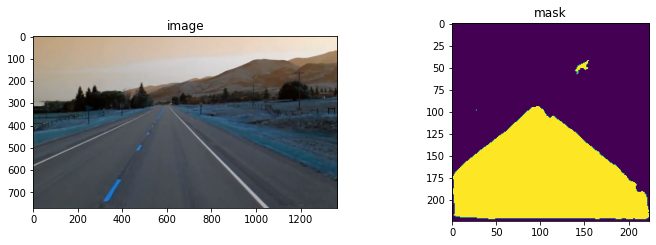

In [ ]:
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
 
model= keras.models.load_model('/content/drive/MyDrive/Models/model_lane_dplv3_97.26%.h5')
# Load image
img1= cv2.imread("/content/Screenshot (489).png")

# Resize image to (224, 224)
img = cv2.resize(img1, (224, 224))

# Preprocess image
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
print(np.unique(predictions))
# Convert predictions to binary mask
mask = (predictions > 0.5).astype(np.uint8)
print(np.unique(mask[0]))
# Save mask as image

plt.figure(figsize=(12,8))
plt.imshow(img1)
plt.subplot(221)
plt.title('image')
plt.imshow(img1)

plt.subplot(222)
plt.title('mask')
plt.imshow(mask[0]* 255)
plt.show()

In [ ]:
# Get predictions for the validation set
y_pred = model.predict(X_val)

# Convert the predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded true labels to class labels
y_true = np.argmax(y_val, axis=1)
print(y_true.shape)
print(y_pred.shape)
y_true=y_true.ravel()
y_pred=y_pred.ravel()
print(y_true.shape)
print(y_pred.shape)

2/2 [==============================] - 97s 44s/step
(58, 224, 1)
(58, 224, 1)
(12992,)
(12992,)


In [ ]:
print(y_true)
print(y_pred)
print(np.unique(y_true))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[  0 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223]


Text(0.5, 1.0, 'Confusion Matrix')

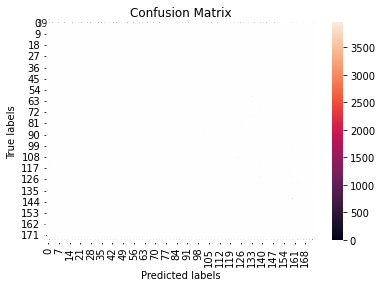

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 